<a href="https://colab.research.google.com/github/Uliana313/NM/blob/main/%D0%A1%D0%B8%D0%B4%D0%BE%D1%80%D0%B5%D0%BD%D0%BA%D0%BE_14%D0%B2_%D0%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13.

#Метод Ейлера

Метод Ейлера:
[2.5    2.6889 2.9349 3.2523 3.6465 4.1084 4.6113 5.1172 5.5982 6.066
 6.5873]


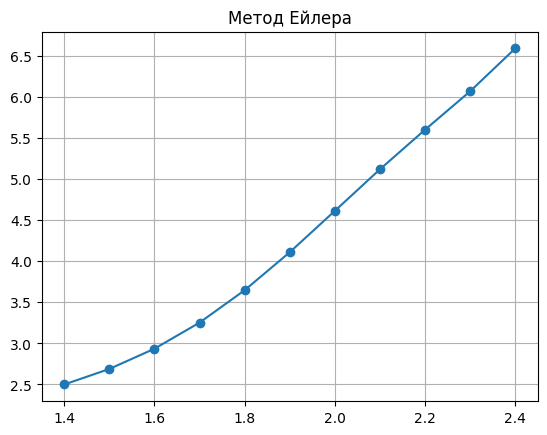

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Функція з умови
def f(x, y):
    return np.cos(np.e ** x) + y

# Початкові дані
a, b = 1.4, 2.4
h = 0.1
y0 = 2.5

n = int((b - a) / h)
x = np.array([a + i*h for i in range(n + 1)])

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера
for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

print("Метод Ейлера:")
print(np.round(y, 4))

plt.plot(x, y, marker='o')
plt.grid()
plt.title("Метод Ейлера")
plt.show()



In [9]:
#Додати перевірку odeint для першого завдання
import numpy as np
from scipy.integrate import odeint

def f_odeint(y, x):
    return np.cos(np.e ** x) + y

# Початкові дані
a, b = 1.4, 2.4
h = 0.1
y0 = 2.5

# Формування масиву x
n = int((b - a) / h)
x = np.array([a + i*h for i in range(n + 1)])

# Розв'язок за допомогою odeint
y_odeint = odeint(f_odeint, y0, x)[:, 0]
y_odeint_rounded = np.round(y_odeint, 4)

print(" Перевірка: odeint ")
print("x (точки оцінки) =", x)
print("y (odeint) =", y_odeint_rounded)

 Перевірка: odeint 
x (точки оцінки) = [1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4]
y (odeint) = [2.5    2.7174 3.0029 3.3679 3.8115 4.3155 4.8453 5.364  5.8604 6.3757
 6.9968]


In [10]:
#додати перевірку solve_ivp для перешого завдання
import numpy as np
from scipy.integrate import solve_ivp

def f_solve_ivp(x, y):
    return np.cos(np.e ** x) + y

# Початкові дані
a, b = 1.4, 2.4
h = 0.1
y0 = 2.5

# Формування масиву x
n = int((b - a) / h)
x_eval = np.array([a + i*h for i in range(n + 1)])

# Розв'язок за допомогою solve_ivp
sol = solve_ivp(f_solve_ivp,
                t_span=(a, b),   # Інтервал інтегрування
                y0=[y0],         # Початкова умова
                t_eval=x_eval)   # Точки, в яких потрібно отримати розв'язок

y_solve_ivp = sol.y[0]
y_solve_ivp_rounded = np.round(y_solve_ivp, 4)

print(" Перевірка: solve_ivp ")
print("x (точки оцінки) =", x_eval)
print("y (solve_ivp) =", y_solve_ivp_rounded)

 Перевірка: solve_ivp 
x (точки оцінки) = [1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4]
y (solve_ivp) = [2.5    2.7177 3.0151 3.3901 3.8256 4.3052 4.8123 5.3311 5.8459 6.3624
 6.9822]


#Метод Ейлера-Коші

Метод Ейлера-Коші:
[2.5    2.7175 3.0021 3.365  3.8049 4.3039 4.8288 5.3452 5.8435 6.3637
 6.9864]


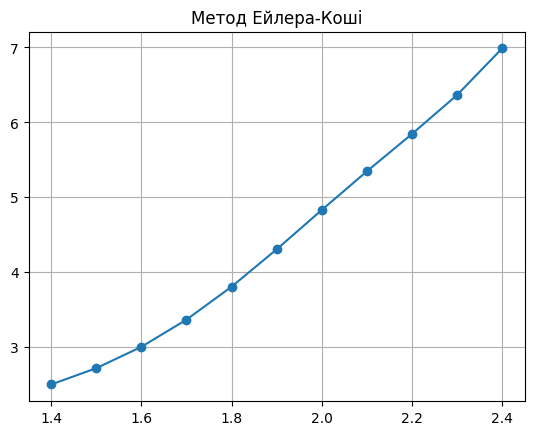

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.cos(np.e ** x) + y

a, b = 1.4, 2.4
h = 0.1
y0 = 2.5

n = int((b - a) / h)
x = np.array([a + i*h for i in range(n + 1)])

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    k1 = f(x[i], y[i])
    y_pred = y[i] + h * k1          # попередній прогноз
    k2 = f(x[i] + h, y_pred)
    y[i + 1] = y[i] + (h / 2) * (k1 + k2)

print("Метод Ейлера-Коші:")
print(np.round(y, 4))

plt.plot(x, y, marker='o')
plt.grid()
plt.title("Метод Ейлера-Коші")
plt.show()



#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x= [0.  0.2 0.4 0.6 0.8 1. ]
y= [2.5        3.15307508 3.90003332 4.74696174 5.70436889 6.79775308]


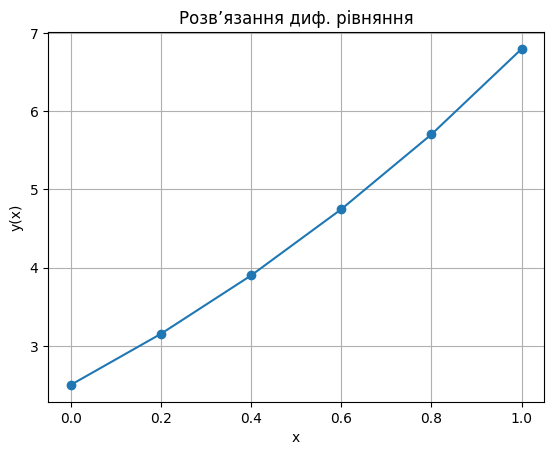

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return np.cos(np.e ** x) + y

# Початкова умова
a = 1.4
b = 2.4
h = 0.1
y0 = 2.5

# Значення x
x = np.array([i * 0.2 for i in range(0, 6)])

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x= [1.4 1.6 1.8 2.  2.2 2.4]
y= [2.5        3.01506041 3.82564785 4.81229872 5.84591188 6.98221665]


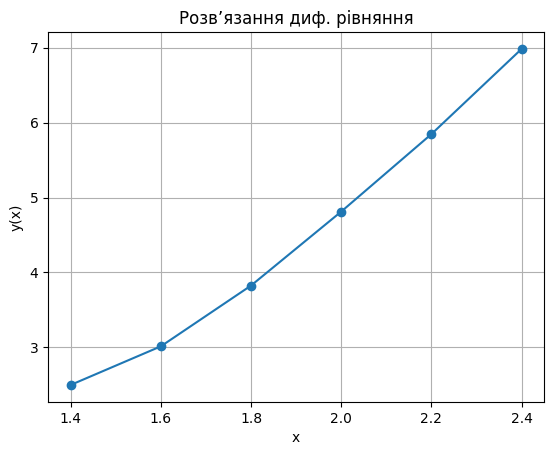

In [18]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return np.cos(np.e ** x) + y

# Початкова умова
y0 = [2.5]  # Потрібно передати як список

# Значення x
x = np.linspace(1.4, 2.4, 6)

# Розв'язання ODE
sol = solve_ivp(model, [1.4, 2.4], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()
